# Deep convolutional classifier

#Dataset

[FASHION MNIST](https://keras.io/api/datasets/fashion_mnist/), 
It contains a total of 70,000 simple images of clothes




LeNet-5

This network is the precursor of more complex convolutional networks used today. It was developed by [Yann LeCun] in 1998, originally used for the MNIST set of hand-drawn digits.


It has 28x28x1 images as inputs: 28 rows, 28 columns and only 1 color channel, that is, gray scale images.



The network has two processing blocks:
- The *convolutional layers* : in charge of identifying characteristics, such as patterns, shapes and edges of the images.
- The *fully connected* layers, which take these characteristics and allow the image to be classified into one of the 10 possible types of clothes in this case.

-For this implementation, *ReLU* activation functions will be used instead of *tanh* that the original LENET-5 uses, thus reducing linearity between layers.

- Note that the *avg-pooling* is performed after the convolutions, reducing the size of the data.

- Although, *dimensions* of images are reduced from one layer to another,the depth (corresponding to the extracted features) increases from one layer to another

- A dropout factor is added to avoid overfitting at the output of the first fully connected layer


## Keras Implementation




In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Dropout
from keras.layers.core import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import optimizers

### Data load and preprocessing


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)



The pixels in the images (both training and validation) have values ​​between 0 and 255; However, to guarantee the convergence of the training, it is necessary to normalize these values ​​between 0 and 1:

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

*Y_train* and *y_test* must be encoded in the *one-hot-encoder* format:





In [ ]:
nclases = 10
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

(-0.5, 27.5, 27.5, -0.5)

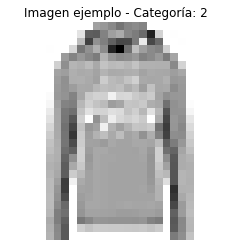

In [ ]:
nimagen = np.random.randint(0,60000)
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')

By default, Keras requires each input data in the format n images x n rows x n columns x n channels, where n channels = 1 because they are grayscale images. The size of *x_train* and *x_test* must be modified to meet this requirement:

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


###  Model



In [ ]:
model = Sequential()

In [ ]:
# CONV1 and avg-POOLING1
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
# CONV2 and avg-POOLING2
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

# Flatten, and fully connected layers
model.add(Flatten())
model.add(Dense(120,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(84,activation='relu'))


#Output of probabilities
model.add(Dense(nclases,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_1 (Batc  (None, 12, 12, 6)        24        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                      

### Compilation

In this stage we define the optimizer to use (Adam with its default parameters), as well as the loss function (cross entropy) and the performance metric (accuracy):

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 3.5 - Training

Train with 40 epoch and a batch size of 50


In [ ]:
nepochs = 40
history = model.fit(x_train,y_train,epochs=nepochs,batch_size=50, verbose=1, validation_data=(x_test,y_test))

Epoch 1/40
1200/1200 [==============================] - 8s 6ms/step - loss: 0.6147 - accuracy: 0.7690 - val_loss: 0.4364 - val_accuracy: 0.8333
Epoch 2/40
1200/1200 [==============================] - 7s 6ms/step - loss: 0.4244 - accuracy: 0.8437 - val_loss: 0.3739 - val_accuracy: 0.8624
Epoch 3/40
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3733 - accuracy: 0.8641 - val_loss: 0.3342 - val_accuracy: 0.8770
Epoch 4/40
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3442 - accuracy: 0.8737 - val_loss: 0.3329 - val_accuracy: 0.8802
Epoch 5/40
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3256 - accuracy: 0.8808 - val_loss: 0.3088 - val_accuracy: 0.8855
Epoch 6/40
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3135 - accuracy: 0.8854 - val_loss: 0.3095 - val_accuracy: 0.8871
Epoch 7/40
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3004 - accuracy: 0.8900 - val_loss: 0.3135 - val_accuracy:

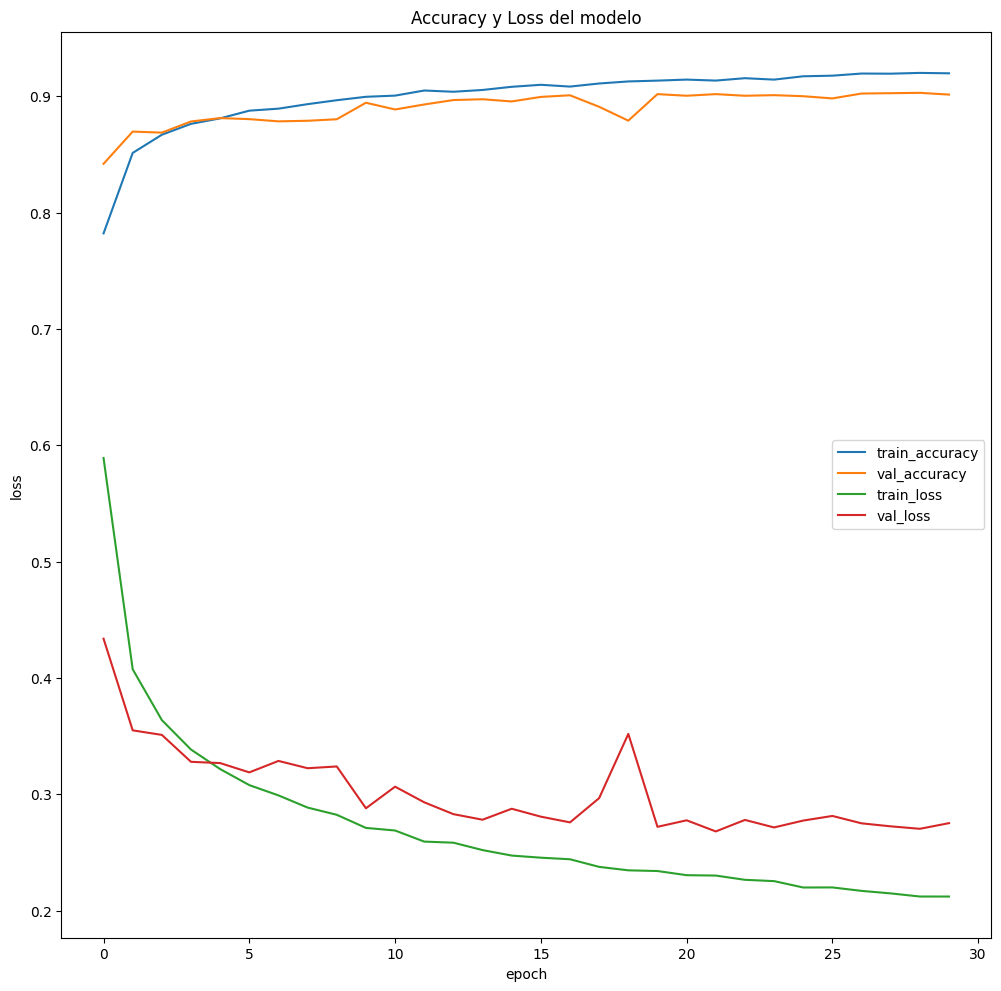

In [ ]:
plt.figure(figsize=(12,12), dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_accuracy', 'val_accuracy','train_loss','val_loss'], loc='center right')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.title('Accuracy y Loss del modelo')
plt.xlabel('epoch')

plt.show()

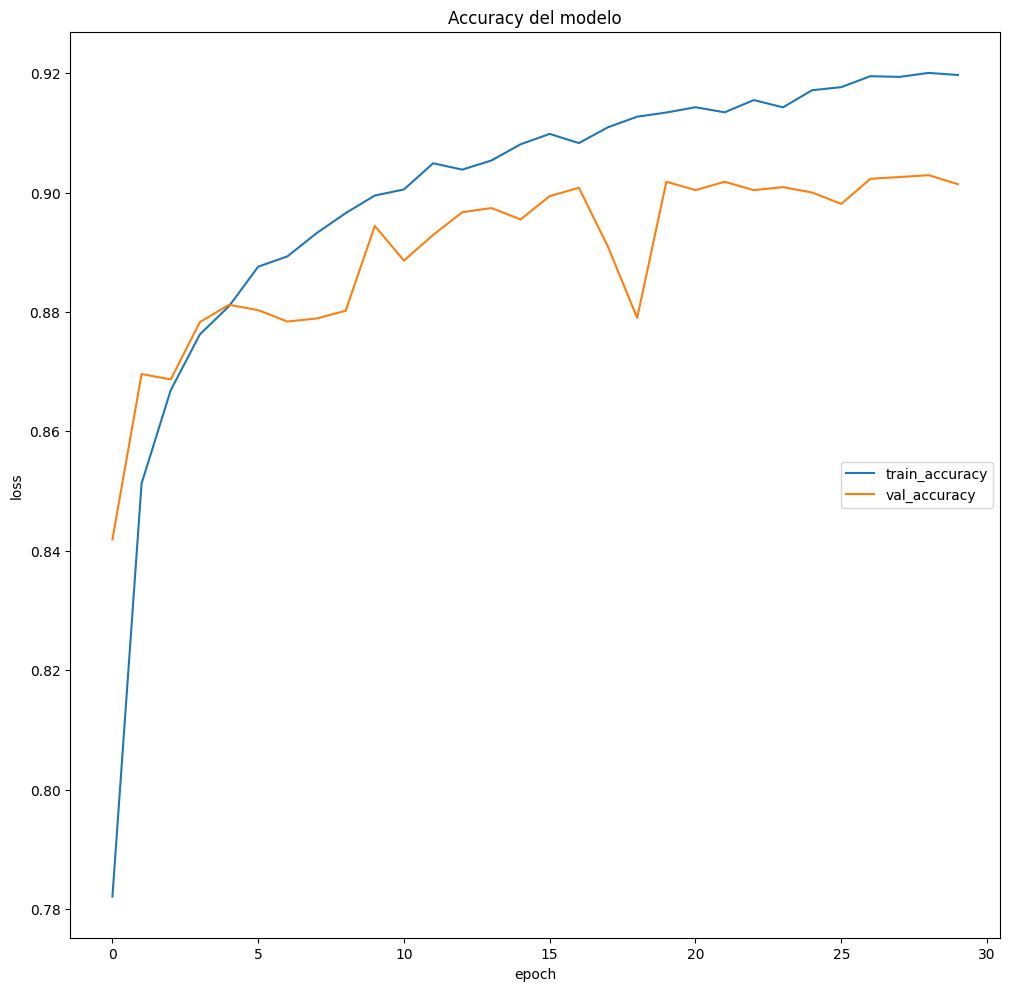

In [ ]:
plt.figure(figsize=(12,12), dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.legend(['train_accuracy', 'val_accuracy'], loc='center right')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.title('Accuracy del modelo')
plt.xlabel('epoch')

plt.show()

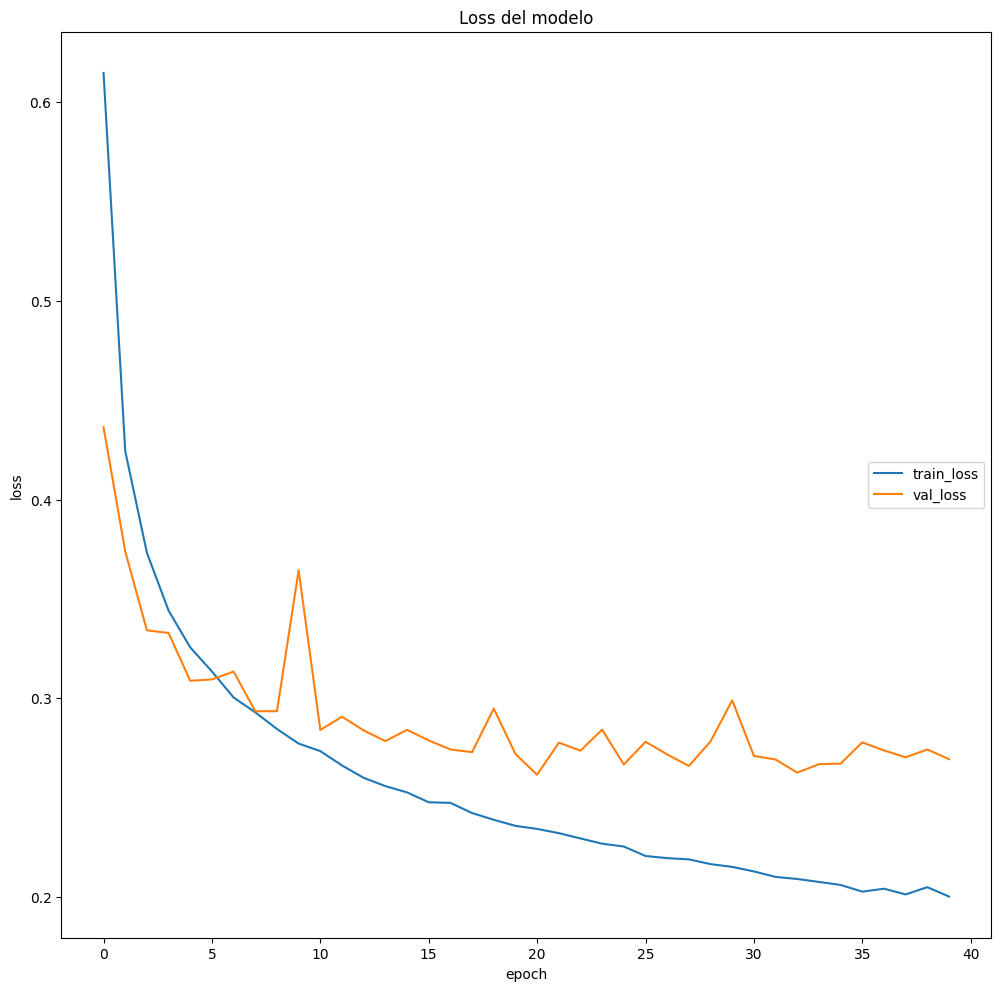

In [ ]:
plt.figure(figsize=(12,12), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'], loc='center right')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.title('Loss del modelo')
plt.xlabel('epoch')

plt.show()


## Model Performance



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    
    fig, ax = plt.subplots(figsize=(12,12),dpi=150)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

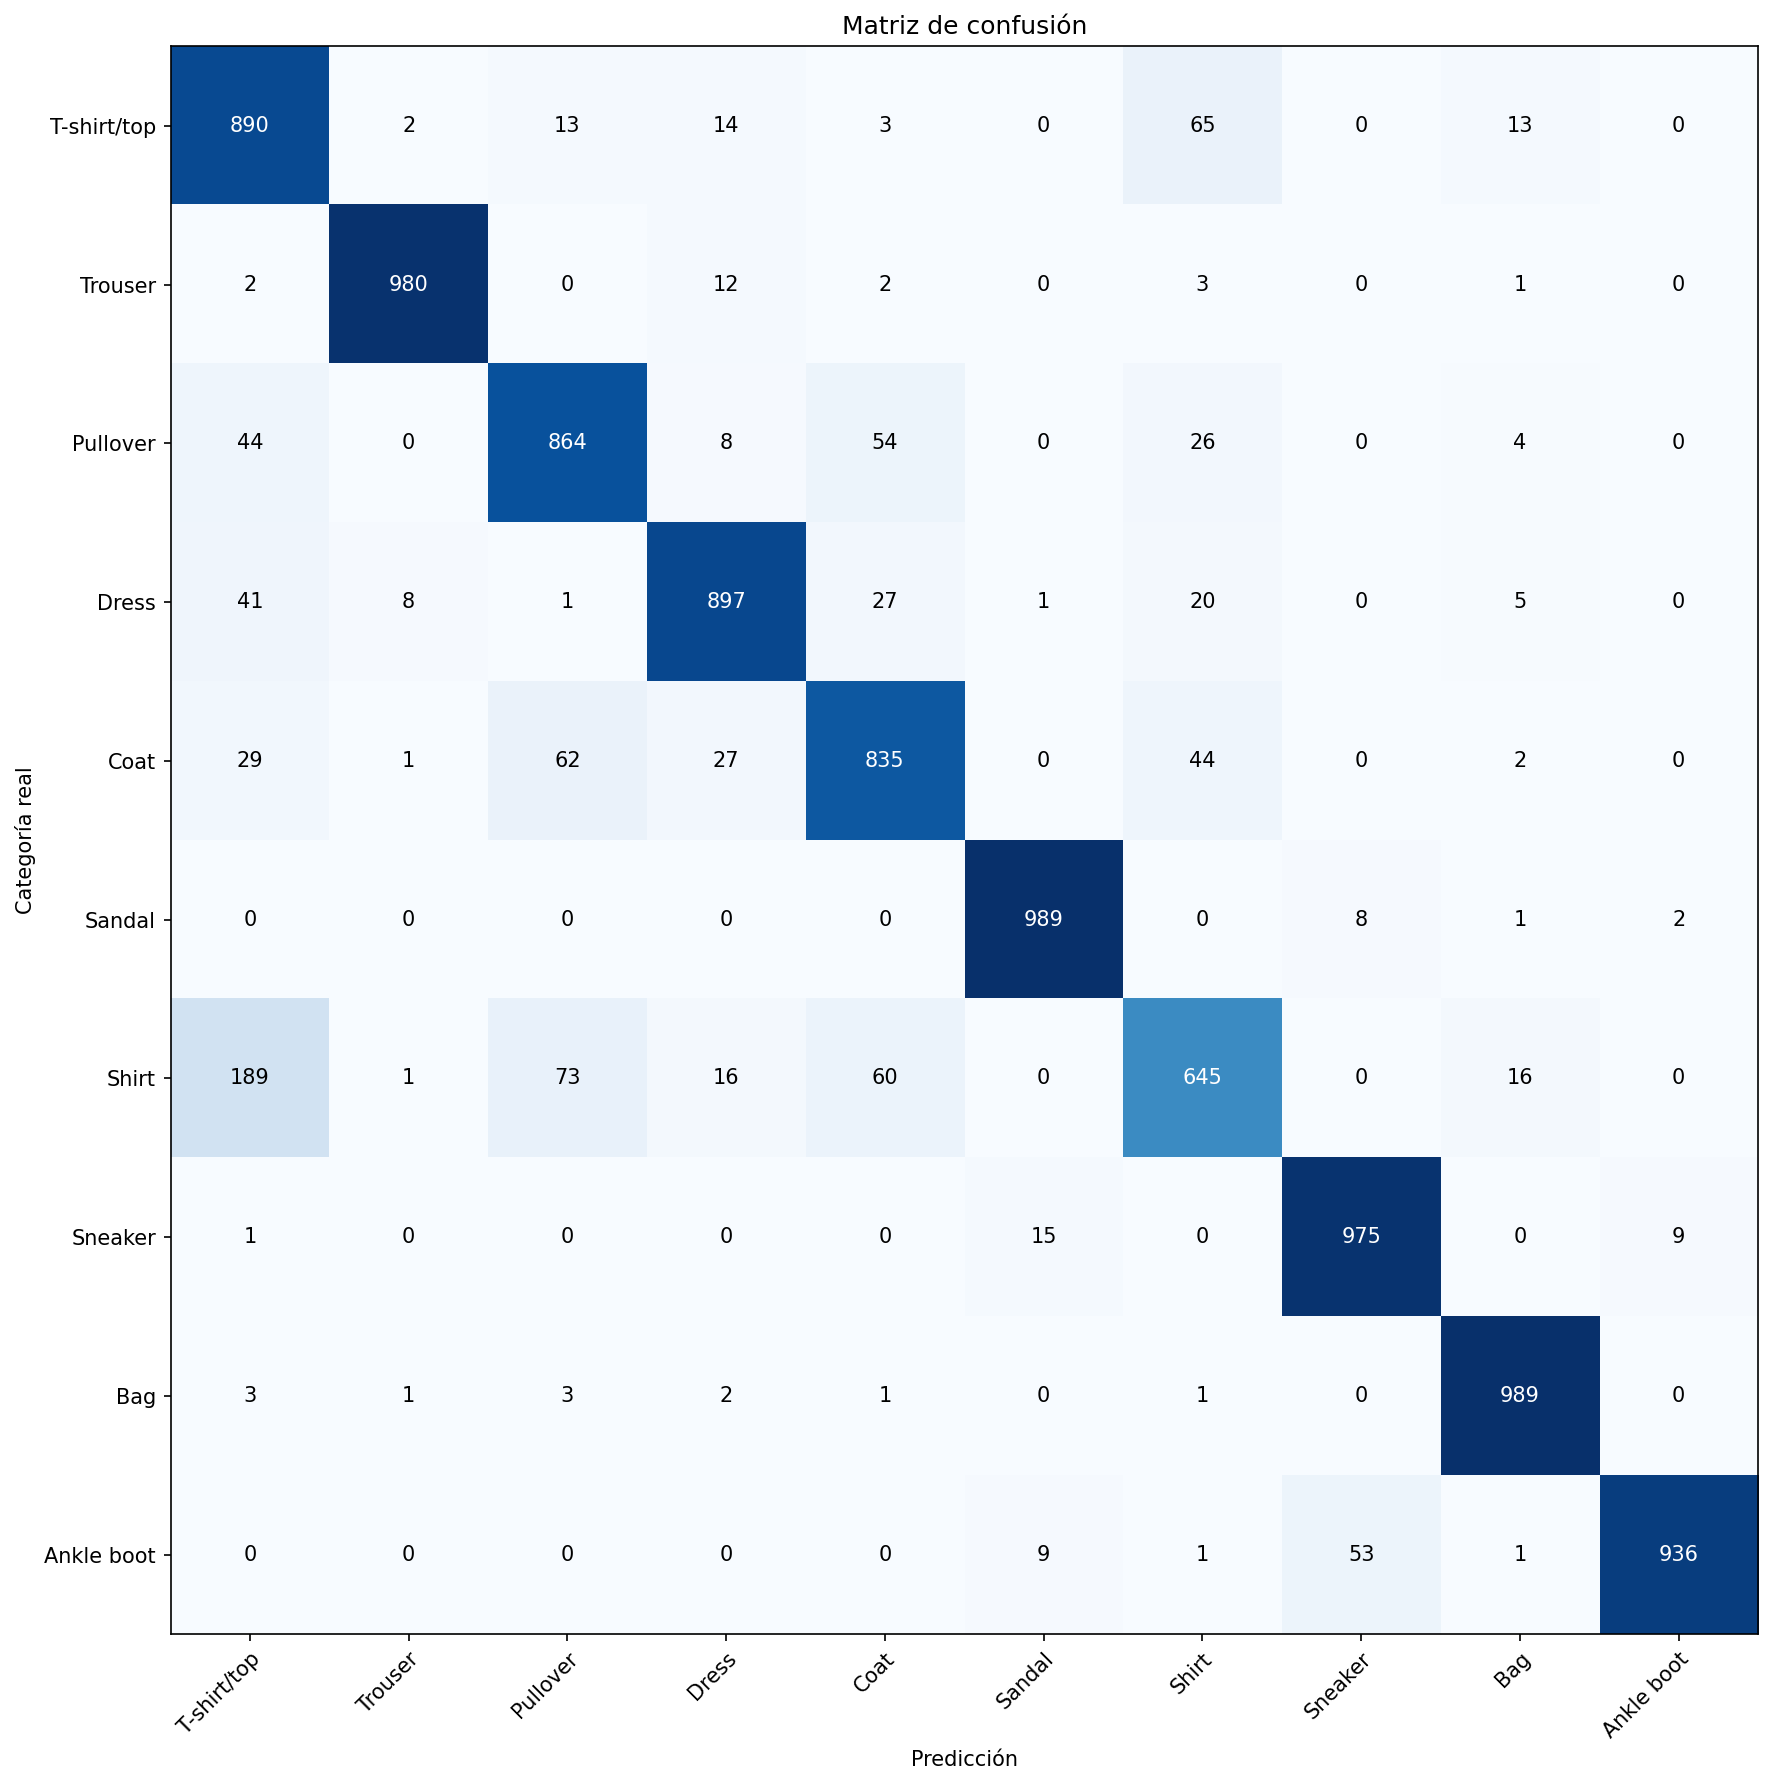

In [ ]:


pred = modelo.predict(x_test)
y_pred =[]
for i in range(len(pred)):
    y_pred.append(np.argmax(pred.round()[i]))
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)

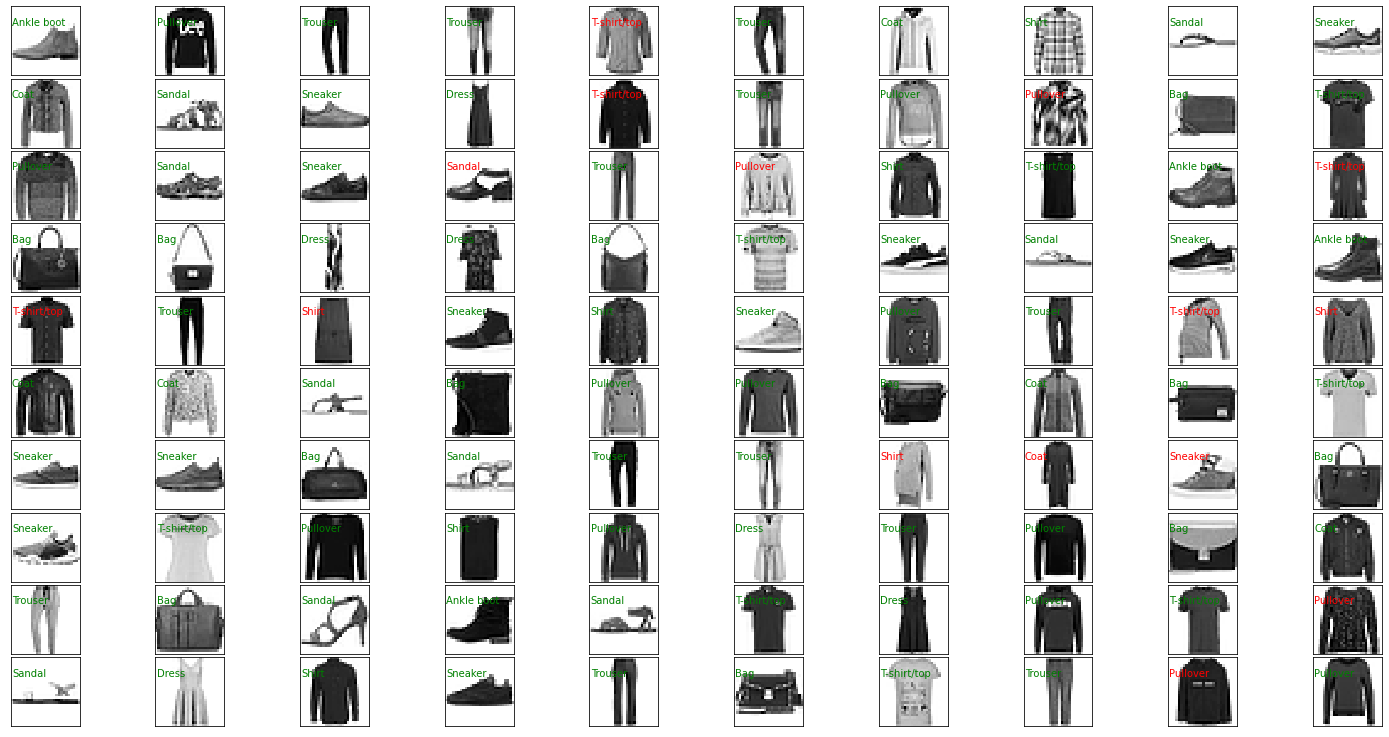

In [ ]:
# set up the figure
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')
  
  if y_ref[i] == y_pred[i]:
    # label the image with the blue text
    ax.text(0, 7, class_names[y_pred[i]], color='green')
  else:
    # label the image with the red text
    ax.text(0, 7, class_names[y_pred[i]], color='red')
